In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('Google_Stock_Price_Train.csv')
test_data=pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = train_data.loc[:,['Open']].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

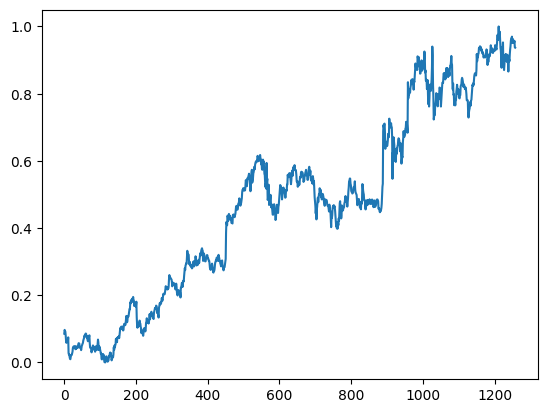

In [7]:
import matplotlib.pyplot as plt
plt.plot(train_scaled)

In [8]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [45]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 5s 37ms/step - loss: 0.1590
Epoch 2/10
38/38 [==============================] - 1s 37ms/step - loss: 0.0524
Epoch 3/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0283
Epoch 4/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0178
Epoch 5/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0152
Epoch 6/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0121
Epoch 7/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0105
Epoch 8/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0087
Epoch 9/10
38/38 [==============================] - 1s 36ms/step - loss: 0.0087
Epoch 10/10
38/38 [==============================] - 1s 35ms/step - loss: 0.0075


In [46]:
real_stock_price = test_data.loc[:,['Open']].values

In [47]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [48]:
total_data = pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs = total_data[len(total_data)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #min max scaler

In [49]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 707ms/step


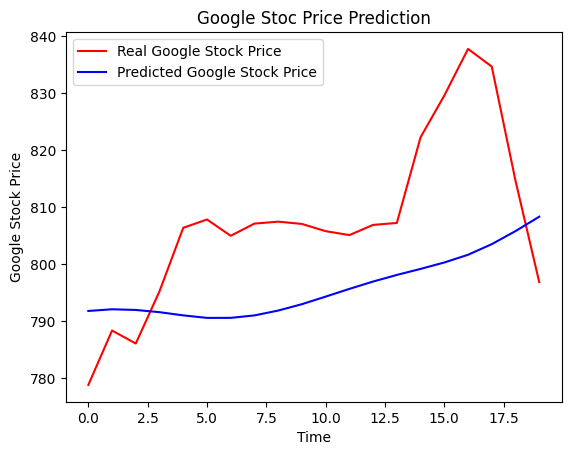

In [50]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stoc Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [51]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50, 50)            5050      
                                                                 
 dropout_8 (Dropout)         (None, 50, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50)               

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  14.964273681640616
MSE:  298.093560776861
RMSE:  17.26538620410389
